In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import plot_roc_curve, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [ ]:
df = pd.read_csv(r'C:\Users\Shubham\Desktop\Projects\Evaluation\(10)_Insurance\Automobile_insurance_fraud.csv')

# Data Understanding

In [ ]:
pd.set_option("display.max_columns", None)
df.head() #Looking into the top 5 rows of the dataset

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


We see from the data that there are null values and missing values represented as '?'. We shall treat them in the later steps

In [ ]:
df.shape #Cecking the shape of the dataset

(1000, 40)

In [ ]:
df.info() #Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df.columns #Calling all the column names of the dataset

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# Treating Null Values

First we will convert all the '?' values into null

In [ ]:
df.replace({'?':np.NaN},inplace=True)

In [ ]:
df.isnull().sum() #Checking for null values

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

The last column is complete null so we will drop the column completely

In [ ]:
df.drop(columns='_c39',inplace=True)

We fill the null values in collision_type with the mode data

In [ ]:
df['collision_type'].mode()

0    Rear Collision
dtype: object

In [ ]:
df['collision_type'].fillna('Rear Collision', inplace=True)

We fill the null values in property_damage with NO

In [ ]:
df['property_damage'].fillna('NO', inplace=True)

We fill the null values in police_report_available with NO

In [ ]:
df['police_report_available'].fillna('NO', inplace=True)

In [ ]:
df.isnull().sum() #Checking for null values

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Exploratory Data Analysis

Let us now look into all the columns one at a time, beginning with the target column 'fraud_reported'

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

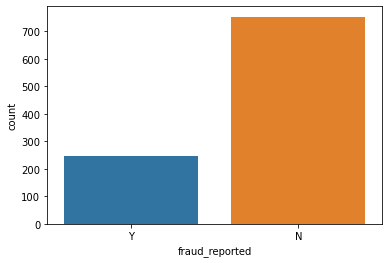

In [ ]:
#Count plot
sns.countplot(df['fraud_reported'])

There is a class imbalance, we shall treat it later in the training stage of the model. For now, let us encode the data using LabelEncoder

In [ ]:
le = LabelEncoder()
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

The next column we look into is the 'months_as_customer'.

<AxesSubplot:xlabel='months_as_customer'>

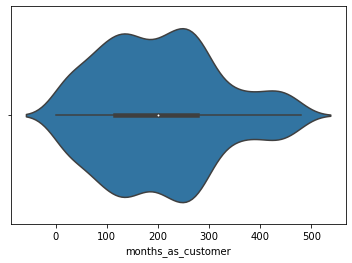

In [ ]:
#Violin plot
sns.violinplot(df['months_as_customer'])

The next column we look into is the 'age'.

<AxesSubplot:xlabel='age'>

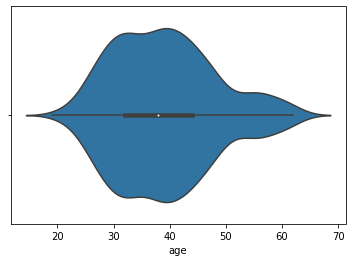

In [ ]:
#Violin plot
sns.violinplot(df['age'])

The next column we look into is the 'policy_number'. This column is an unique number given to the customer and hence should not play a role in the prediction model. Hence, we drop this column

In [ ]:
#Dropping the column
df.drop(columns='policy_number',inplace=True)

The next column we look into is the 'policy_bind_date'. This date represents the day the policy was made for the customer, however, we get similar data through the months_as_customer column and hence we shall drop this column too.

In [ ]:
#Dropping the column
df.drop(columns='policy_bind_date',inplace=True)

The next column we look into is the 'policy_state'

<AxesSubplot:xlabel='policy_state', ylabel='count'>

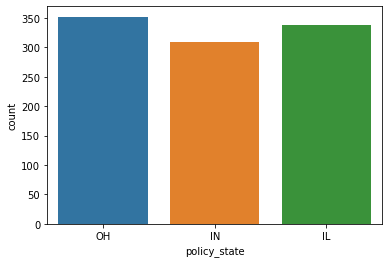

In [ ]:
#Count plot
sns.countplot(df['policy_state'])

Encoding the data using Label Encoder

In [ ]:
le = LabelEncoder()
df['policy_state'] = le.fit_transform(df['policy_state'])

The next column we look into is the 'policy_csl'.

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

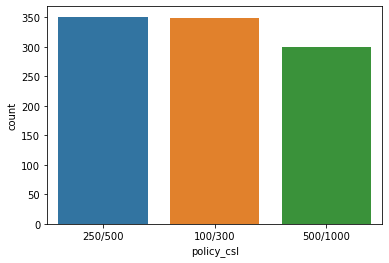

In [ ]:
#Count plot
sns.countplot(df['policy_csl'])

Encoding the data using Label Encoder

In [ ]:
le = LabelEncoder()
df['policy_csl'] = le.fit_transform(df['policy_csl'])

The next column we look into is the 'policy_deductable'.

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

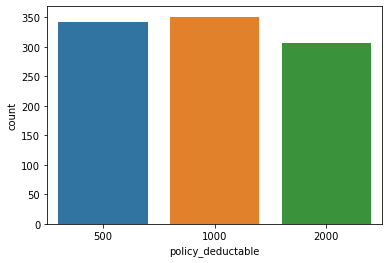

In [ ]:
#Count plot
sns.countplot(df['policy_deductable'])

The next column we look into is the 'policy_annual_premium'.

<AxesSubplot:xlabel='policy_annual_premium'>

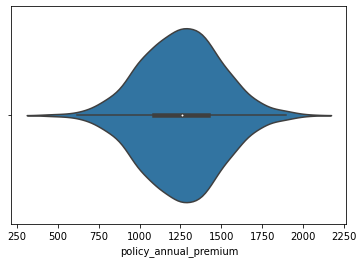

In [ ]:
#Violin plot
sns.violinplot(df['policy_annual_premium'])

The next column we look into is the 'umbrella_limit'.

<AxesSubplot:xlabel='umbrella_limit'>

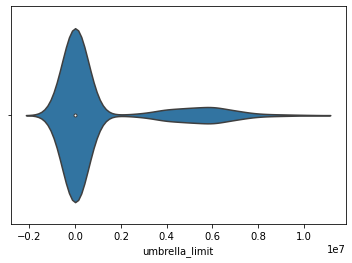

In [ ]:
#Violin plot
sns.violinplot(df['umbrella_limit'])

The next column we look into is the 'insured_zip'.

<AxesSubplot:xlabel='insured_zip'>

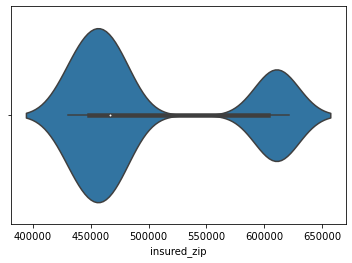

In [ ]:
#Violin plot
sns.violinplot(df['insured_zip'])

The next column we look into is the 'insured_sex'.

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

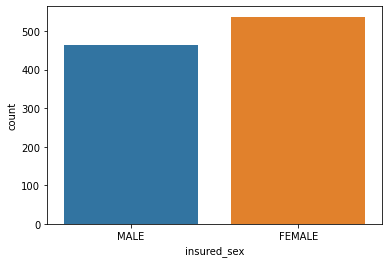

In [ ]:
#Count plot
sns.countplot(df['insured_sex'])

In [ ]:
#Encoding data
le = LabelEncoder()
df['insured_sex'] = le.fit_transform(df['insured_sex'])

The next column we look into is the 'insured_education_level'.

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

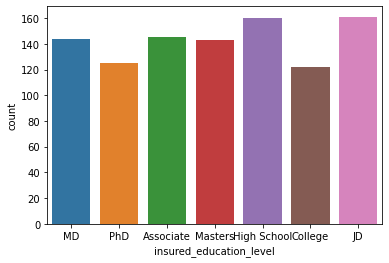

In [ ]:
#Count plot
sns.countplot(df['insured_education_level'])

In [ ]:
#Encoding data
le = LabelEncoder()
df['insured_education_level'] = le.fit_transform(df['insured_education_level'])

The next column we look into is the 'insured_occupation'.

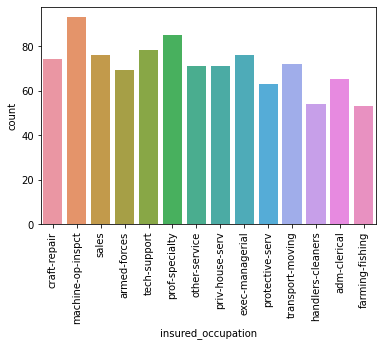

In [ ]:
#Count plot
sns.countplot(df['insured_occupation'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Encoding data
le = LabelEncoder()
df['insured_occupation'] = le.fit_transform(df['insured_occupation'])

The next column we look into is the 'insured_hobbies'.

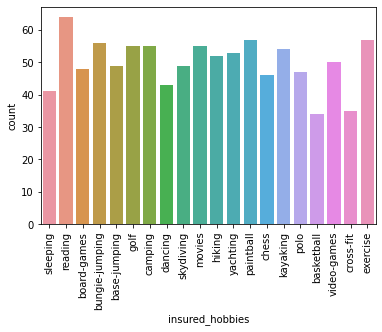

In [ ]:
#Count plot
sns.countplot(df['insured_hobbies'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Encoding data
le = LabelEncoder()
df['insured_hobbies'] = le.fit_transform(df['insured_hobbies'])

The next column we look into is the 'insured_relationship'.

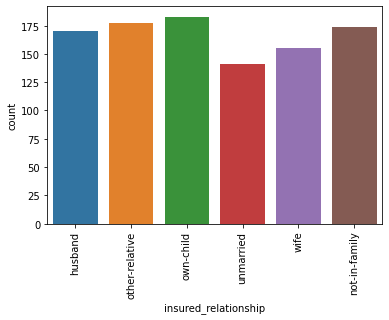

In [ ]:
#Count plot
sns.countplot(df['insured_relationship'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Encoding data
le = LabelEncoder()
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])

The next column we look into is the 'capital-gains'.

<AxesSubplot:xlabel='capital-gains'>

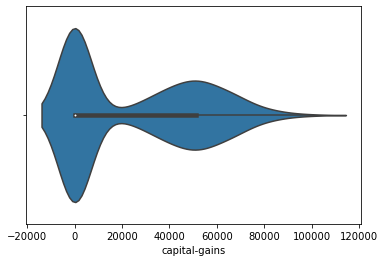

In [ ]:
#Violin plot
sns.violinplot(df['capital-gains'])

The next column we look into is the 'capital-loss'.

<AxesSubplot:xlabel='capital-loss'>

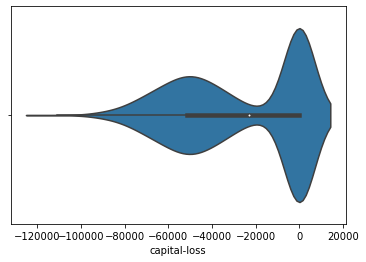

In [ ]:
#Violin plot
sns.violinplot(df['capital-loss'])

The next column we look into is the 'incident_date'.

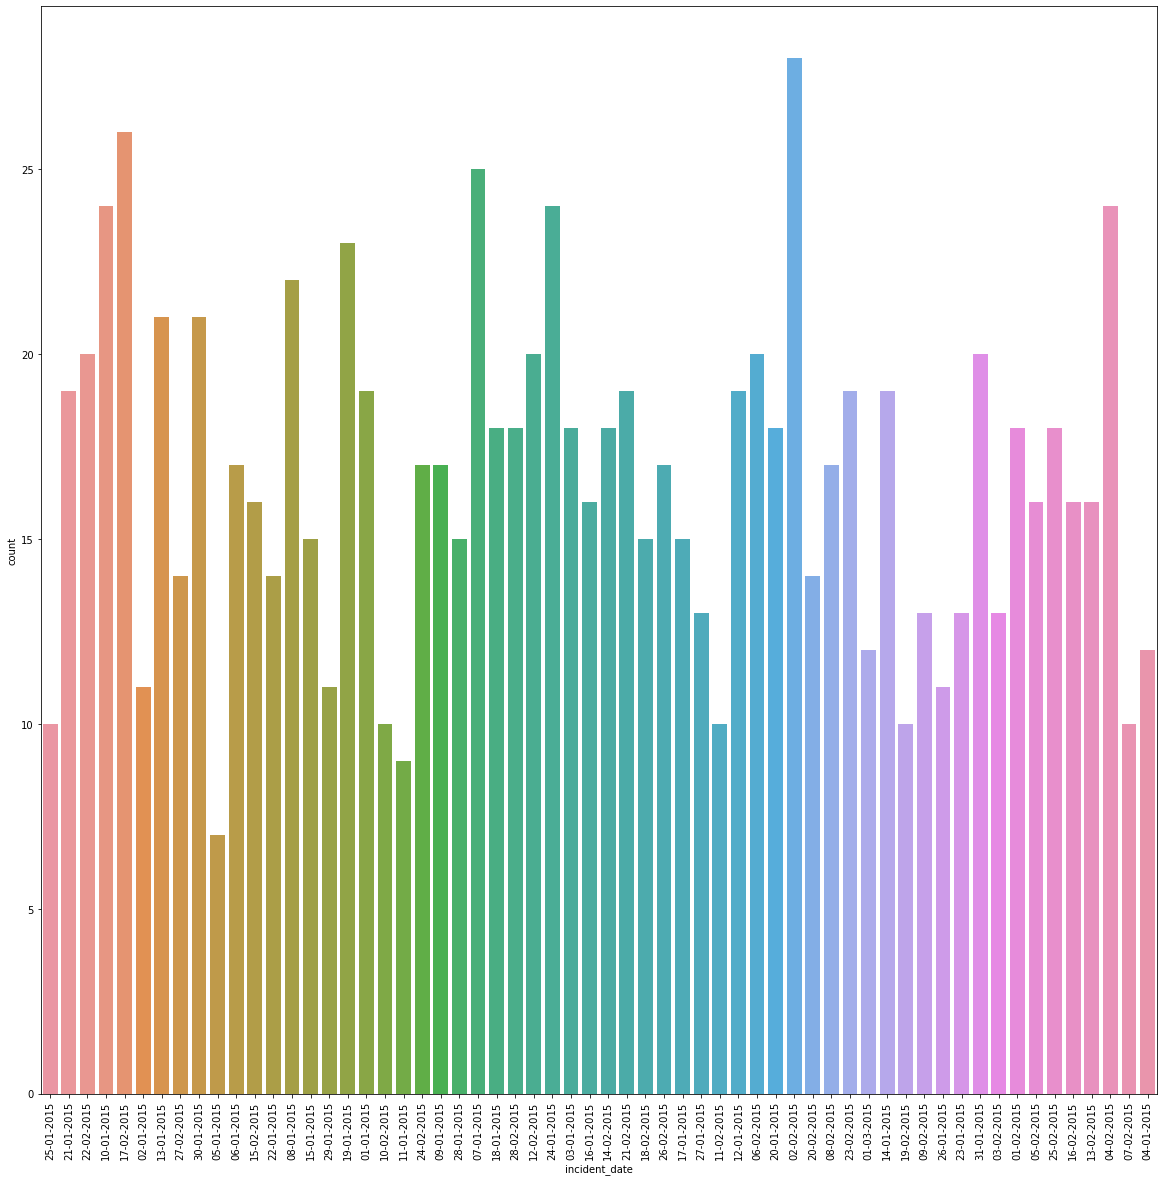

In [ ]:
#Count plot
plt.figure(figsize=(20,20))
sns.countplot(df['incident_date'])
plt.xticks(rotation=90)
plt.show()

Here we see that all the data are from first quarter of the 2015 year, and so we shall drop this column

In [ ]:
#Dropping the column
df.drop(columns='incident_date',inplace=True)

The next column we look into is the 'incident_type'.

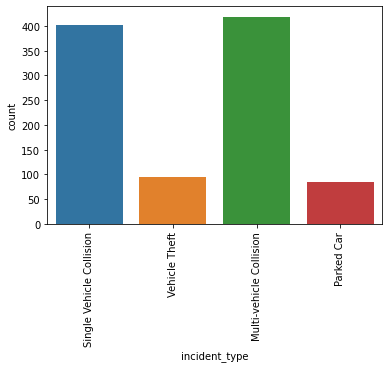

In [ ]:
#Count plot
sns.countplot(df['incident_type'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Encoding data
le = LabelEncoder()
df['incident_type'] = le.fit_transform(df['incident_type'])

The next column we look into is the 'collision_type'.

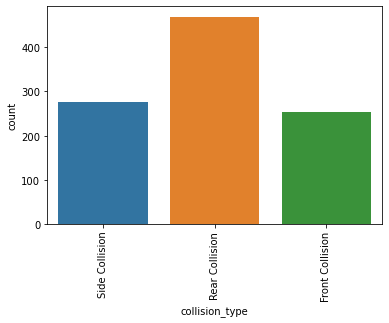

In [ ]:
#Count plot
sns.countplot(df['collision_type'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Encoding data
le = LabelEncoder()
df['collision_type'] = le.fit_transform(df['collision_type'])

The next column we look into is the 'incident_severity'.

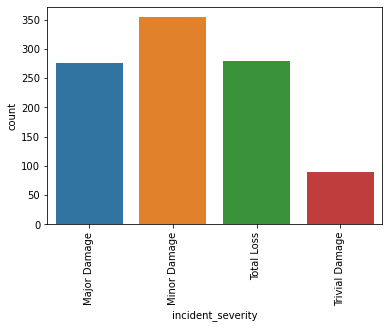

In [ ]:
#Count plot
sns.countplot(df['incident_severity'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Encoding data
le = LabelEncoder()
df['incident_severity'] = le.fit_transform(df['incident_severity'])

The next column we look into is the 'authorities_contacted'.

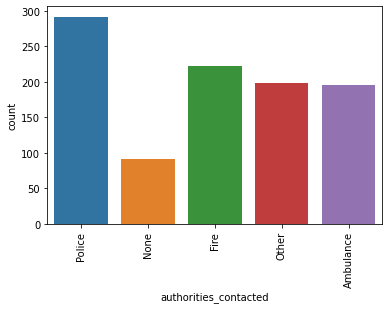

In [ ]:
#Count plot
sns.countplot(df['authorities_contacted'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Encoding data
le = LabelEncoder()
df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])

The next column we look into is the 'incident_state'.

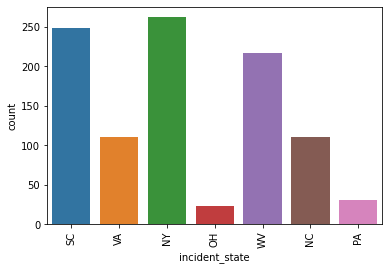

In [ ]:
#Count plot
sns.countplot(df['incident_state'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Encoding data
le = LabelEncoder()
df['incident_state'] = le.fit_transform(df['incident_state'])

The next column we look into is the 'incident_city'.

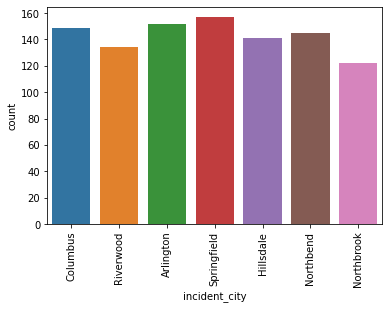

In [ ]:
#Count plot
sns.countplot(df['incident_city'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Encoding data
le = LabelEncoder()
df['incident_city'] = le.fit_transform(df['incident_city'])

The next column we look into is the 'incident_location'. This represents the exact location of the accident, which is already received using the incident state and city and hence we shall drop this column


In [ ]:
#Dropping the column
df.drop(columns='incident_location',inplace=True)

The next column we look into is the 'incident_hour_of_the_day'.

<AxesSubplot:xlabel='incident_hour_of_the_day'>

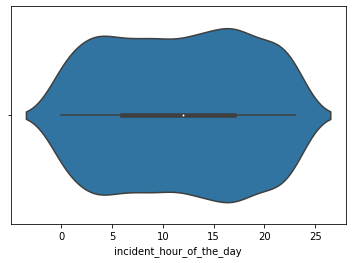

In [ ]:
#Violin plot
sns.violinplot(df['incident_hour_of_the_day'])

The next column we look into is the 'number_of_vehicles_involved'.

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

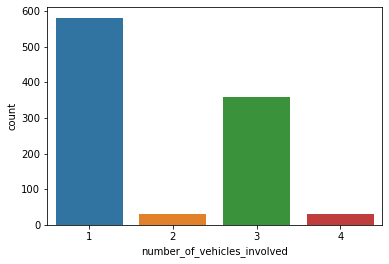

In [ ]:
#Violin plot
sns.countplot(df['number_of_vehicles_involved'])

The next column we look into is the 'property_damage'.

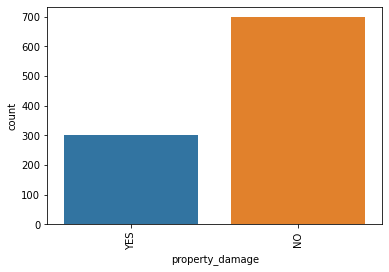

In [ ]:
#Count plot
sns.countplot(df['property_damage'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Encoding data
le = LabelEncoder()
df['property_damage'] = le.fit_transform(df['property_damage'])

The next column we look into is the 'bodily_injuries'.

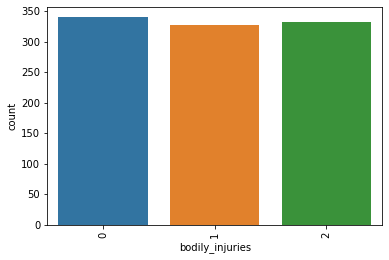

In [ ]:
#Count plot
sns.countplot(df['bodily_injuries'])
plt.xticks(rotation=90)
plt.show()

The next column we look into is the 'witnesses'.

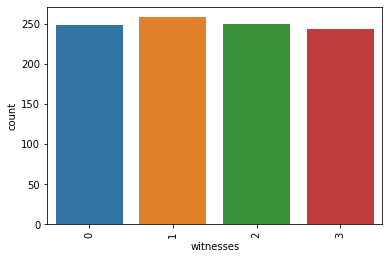

In [ ]:
#Count plot
sns.countplot(df['witnesses'])
plt.xticks(rotation=90)
plt.show()

The next column we look into is the 'police_report_available'.

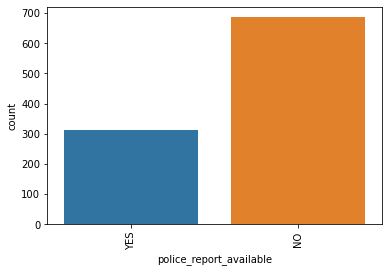

In [ ]:
#Count plot
sns.countplot(df['police_report_available'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Encoding data
le = LabelEncoder()
df['police_report_available'] = le.fit_transform(df['police_report_available'])

The next column we look into is the 'total_claim_amount'.

<AxesSubplot:xlabel='total_claim_amount'>

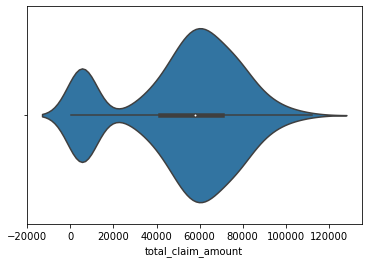

In [ ]:
#Violin plot
sns.violinplot(df['total_claim_amount'])

The next column we look into is the 'injury_claim'.

<AxesSubplot:xlabel='injury_claim'>

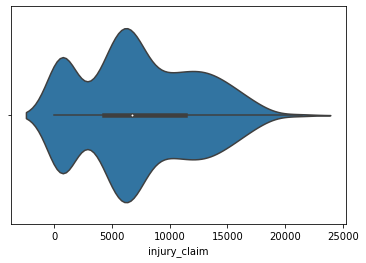

In [ ]:
#Violin plot
sns.violinplot(df['injury_claim'])

The next column we look into is the 'property_claim'.

<AxesSubplot:xlabel='property_claim'>

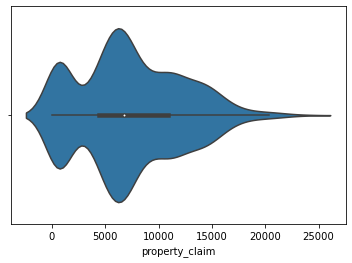

In [ ]:
#Violin plot
sns.violinplot(df['property_claim'])

The next column we look into is the 'vehicle_claim'.

<AxesSubplot:xlabel='vehicle_claim'>

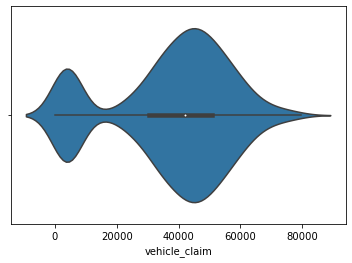

In [ ]:
#Violin plot
sns.violinplot(df['vehicle_claim'])

The next column we look into is the 'auto_make'.

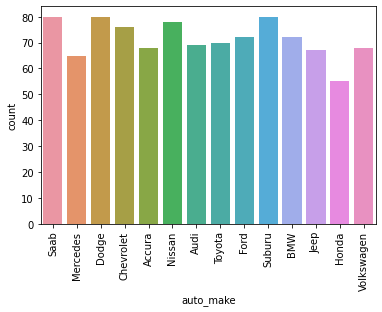

In [ ]:
#Count plot
sns.countplot(df['auto_make'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Encoding data
le = LabelEncoder()
df['auto_make'] = le.fit_transform(df['auto_make'])

The next column we look into is the 'auto_model'.

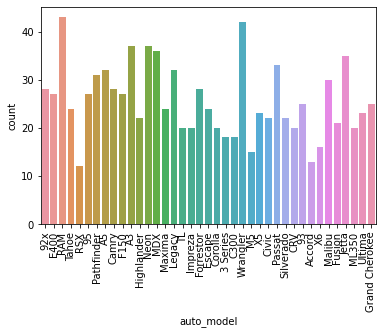

In [ ]:
#Count plot
sns.countplot(df['auto_model'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Encoding data
le = LabelEncoder()
df['auto_model'] = le.fit_transform(df['auto_model'])

The next column we look into is the 'auto_year'.

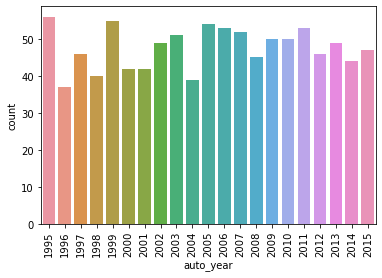

In [ ]:
#Count plot
sns.countplot(df['auto_year'])
plt.xticks(rotation=90)
plt.show()

From the above visualization we note that the data is coplete and all numerical with a little of skewness and outliers present. Hence, we shall treat for the same.

# Correlation

Now, since all the data has been transformed into numeric values. Let us check for the correlation to the target column

In [ ]:
df.corr() #Correlation matrix

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.072787,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.075642,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.052438,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,-0.008465,0.013384,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,0.011997,0.020641,0.022530,0.056182,0.032814,0.009333,-0.001869,-0.019403,-0.027634,-0.000595,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.053912,-0.015711,-0.000760,0.006517,-0.045117,0.060935,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.036556,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,0.015966,0.010041,0.009466,0.029044,-0.077492,0.013094,-0.023257,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,0.002106,-0.002355,0.006303,0.049372,-0.010840,-0.016882,-0.023855,-0.017548,-0.047669,-0.017532,0.008274,0.027448,0.023861,0.028695,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,-0.021705,0.009952,-0.014293,-0.028168,0.017914,-0.022379,0.014470,0.019290,0.018793,0.026969,-0.020297,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,-0.020298,0.021807,-0.023488,0.039912,0.041193,0.013704,-0.019230,-0.006420,-0.010838,-0.005903,-0.018636,-0.057061,-0.003768,-0.048909,-0.012072,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.0

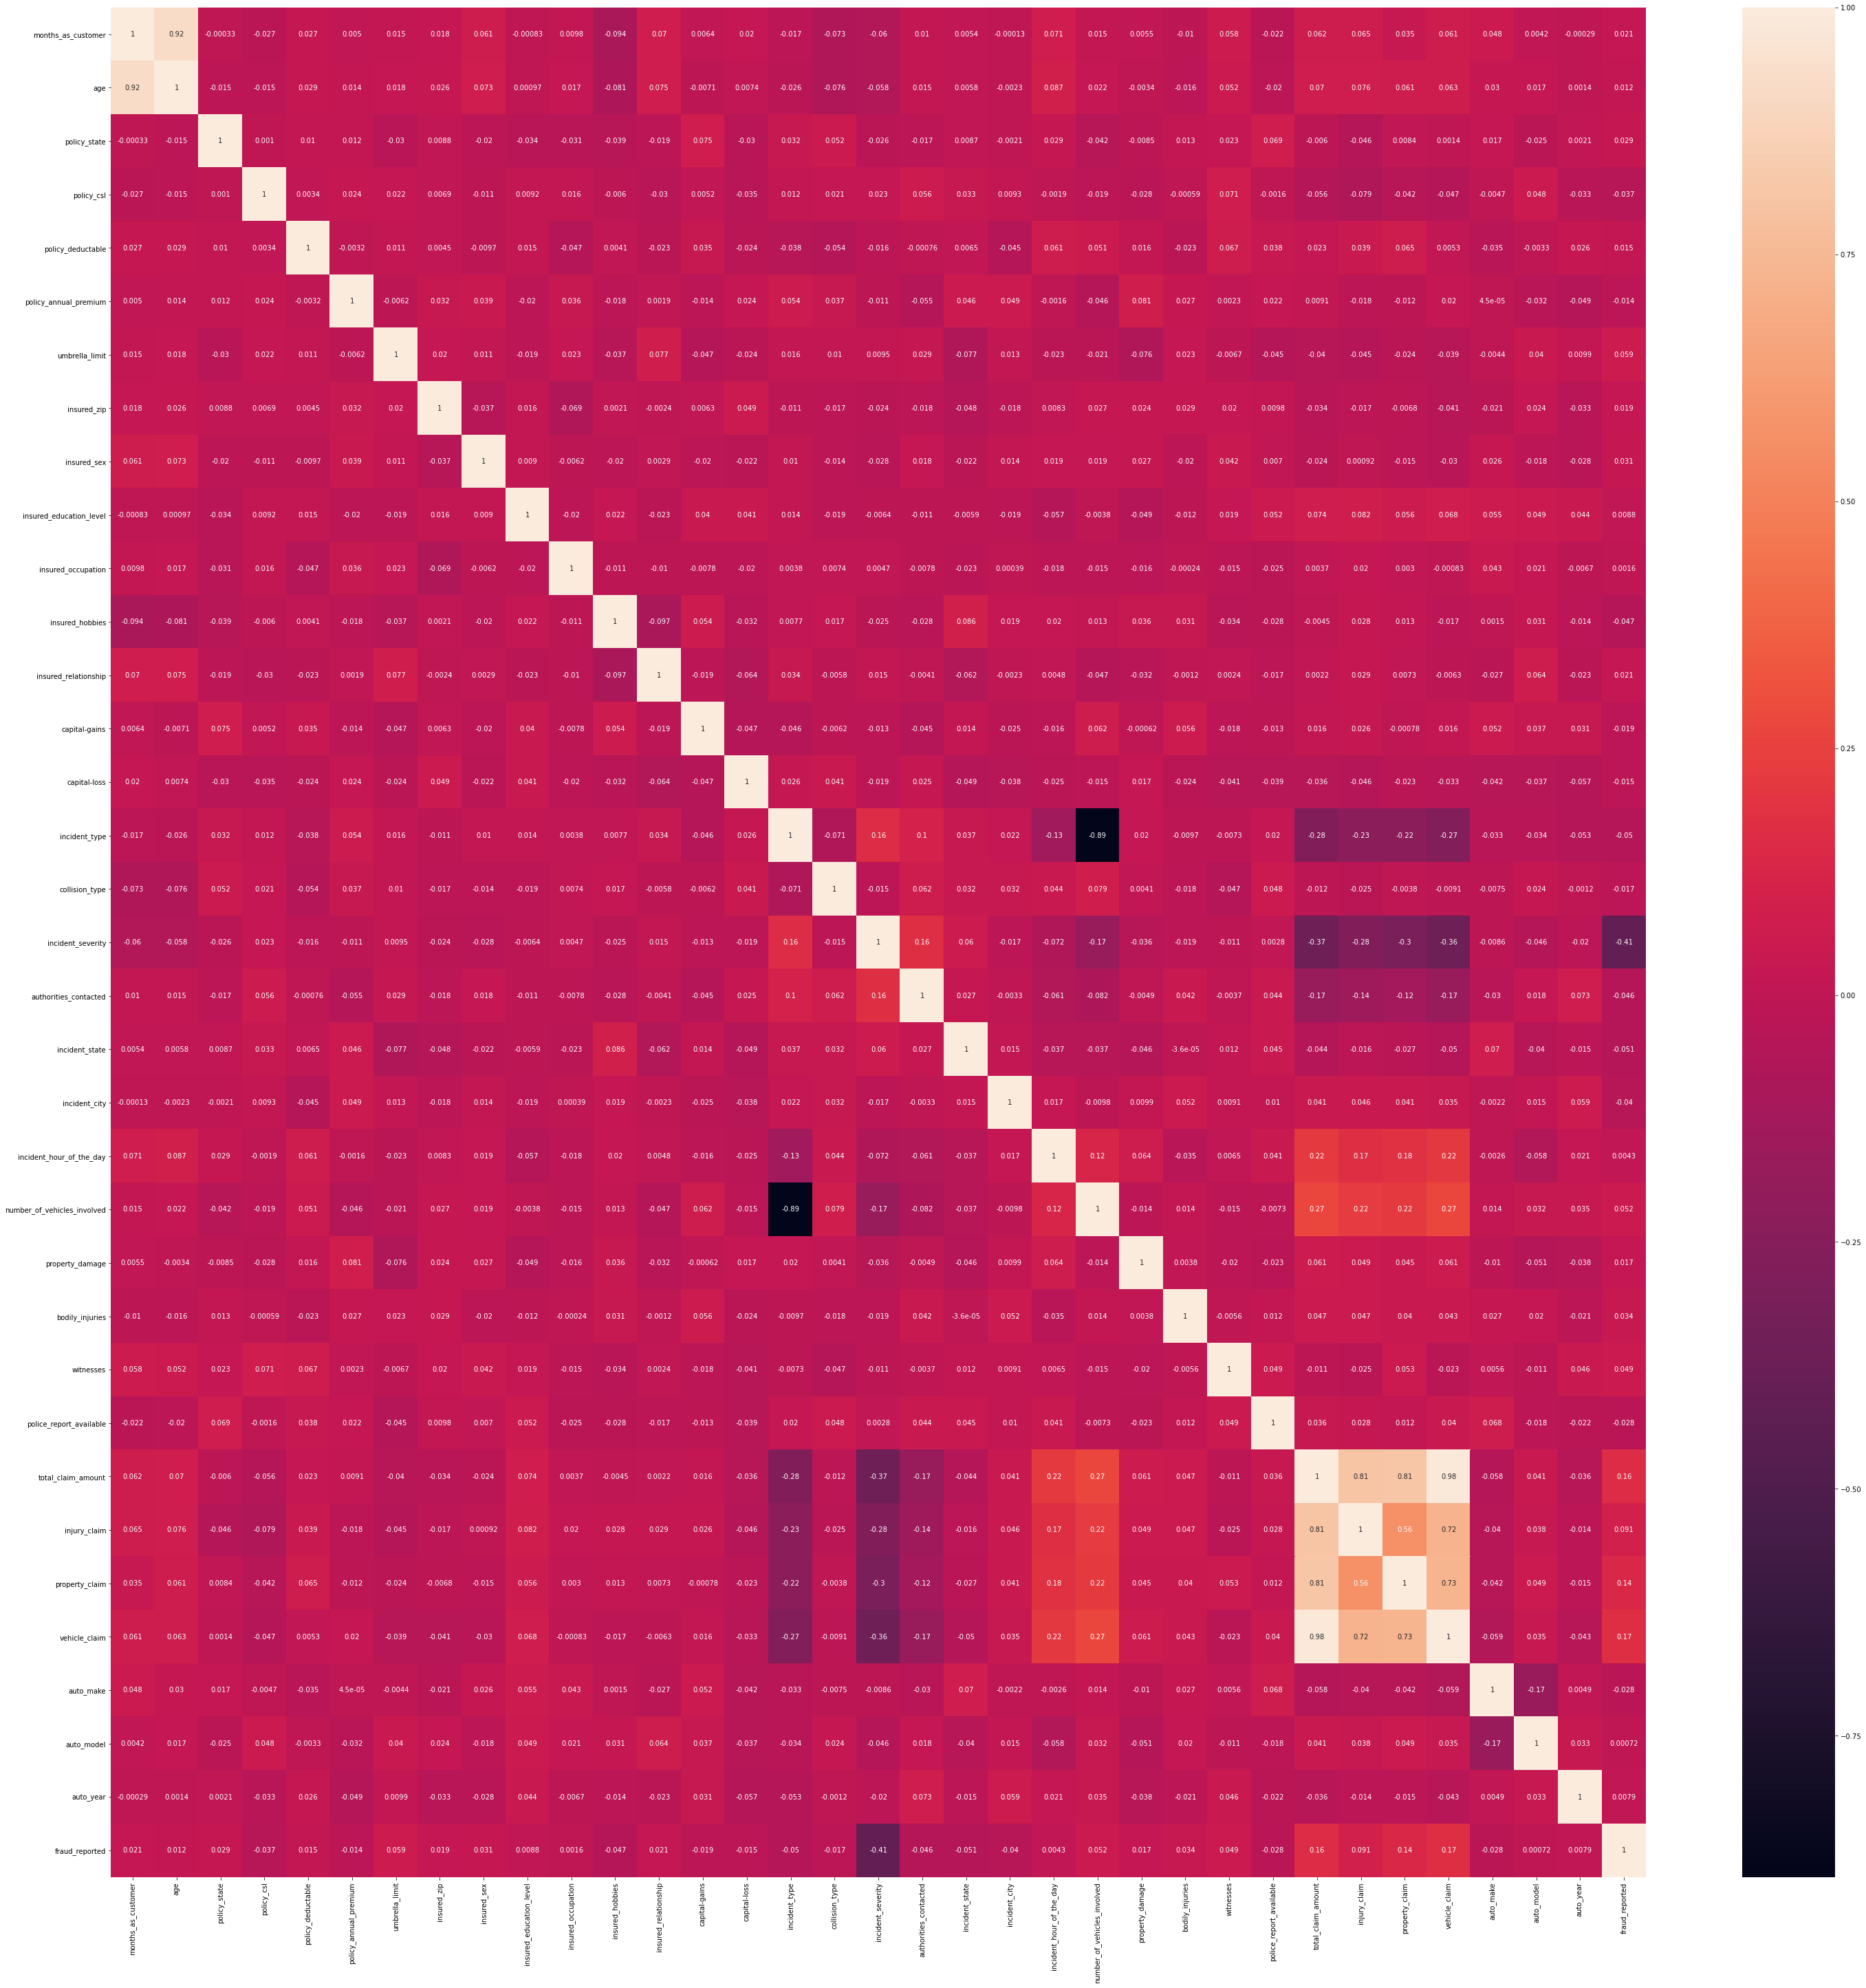

In [ ]:
#Visualization for correlation matrix
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#Correlation wrt target column 'fraud_reported'
df.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
police_report_available       -0.027768
auto_make                     -0.027519
capital-gains                 -0.019173
collision_type                -0.017315
capital-loss                  -0.014863
policy_annual_premium         -0.014480
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
property_damage                0.017202
insured_zip                    0.019368
months_as_customer             0.020544
insured_relationship           0.021043
policy_state                   0.029432


We see that 'incident_severity' has the highest correlation in the negative side

# Outliers

We use the zscore method to remove the outliers with a threshold of 3

In [ ]:
z = np.abs(zscore(df)) #Calculation zscore
df_new = df[(z<3).all(axis=1)] #Removing outliers based on zscore threshold

In [ ]:
df_new.shape

(980, 35)

In [ ]:
print('Percentage loss of data =\t', ((df.shape[0]-df_new.shape[0])/df.shape[0])*100, '%')

Percentage loss of data =	 2.0 %


# Skewness

First, we split the data into feature and target columns.

In [ ]:
x = df_new.drop(columns={'fraud_reported'}) #Independent variables
y = df_new[{'fraud_reported'}] #Target variables

Checking for skewness

In [ ]:
#Checking skewness value for each column
x.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757


In [ ]:
#Using power transform to treat skewness
x = power_transform(x)

# Scaling the Data

In [ ]:
#Scaling using Standard Scaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Best Random State

In [ ]:
maxRS = 0
maxAcc = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.8520408163265306
Random State: 	 9


Now since we got the best random state for data modelling, we create the test train models

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=maxRS)

# Balancing the Train Data

In [ ]:
#Checking the value_counts before oversampling
y_train.value_counts()

fraud_reported
0                 585
1                 199
dtype: int64

In [ ]:
#Oversampling using SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train) #Over-sampling
x_train, y_train = X_train_res, y_train_res #Assigning to the previous variable

In [ ]:
#Checking the value_counts after oversampling
y_train.value_counts()

fraud_reported
0                 585
1                 585
dtype: int64

# Model Predictions

Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 78.57142857142857
[[121  34]
 [  8  33]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       155
           1       0.49      0.80      0.61        41

    accuracy                           0.79       196
   macro avg       0.72      0.79      0.73       196
weighted avg       0.84      0.79      0.80       196



K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 45.40816326530612
[[56 99]
 [ 8 33]]
              precision    recall  f1-score   support

           0       0.88      0.36      0.51       155
           1       0.25      0.80      0.38        41

    accuracy                           0.45       196
   macro avg       0.56      0.58      0.45       196
weighted avg       0.74      0.45      0.48       196



Support Vector Classifier

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 77.04081632653062
[[131  24]
 [ 21  20]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       155
           1       0.45      0.49      0.47        41

    accuracy                           0.77       196
   macro avg       0.66      0.67      0.66       196
weighted avg       0.78      0.77      0.77       196



Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 79.59183673469387
[[132  23]
 [ 17  24]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       155
           1       0.51      0.59      0.55        41

    accuracy                           0.80       196
   macro avg       0.70      0.72      0.71       196
weighted avg       0.81      0.80      0.80       196



Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 83.6734693877551
[[141  14]
 [ 18  23]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       155
           1       0.62      0.56      0.59        41

    accuracy                           0.84       196
   macro avg       0.75      0.74      0.74       196
weighted avg       0.83      0.84      0.83       196



XGB Classifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 88.26530612244898
[[141  14]
 [  9  32]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       155
           1       0.70      0.78      0.74        41

    accuracy                           0.88       196
   macro avg       0.82      0.85      0.83       196
weighted avg       0.89      0.88      0.89       196



Out of all the models XGB Classifier and the Random Forest Classifier has the highest accuracy

# Cross validation

In [ ]:
scr1 = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression is: \t", scr1.mean())

Cross validation score of Logistic Regression is: 	 0.7785714285714286


In [ ]:
scr2 = cross_val_score(knn, x, y, cv=5)
print("Cross validation score of KNN is: \t", scr2.mean())

Cross validation score of KNN is: 	 0.7357142857142858


In [ ]:
scr3 = cross_val_score(svc, x, y, cv=5)
print("Cross validation score of SVC is: \t", scr3.mean())

Cross validation score of SVC is: 	 0.7489795918367348


In [ ]:
scr4 = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree is: \t", scr4.mean())

Cross validation score of Decision Tree is: 	 0.7663265306122449


In [ ]:
scr5 = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest is: \t", scr5.mean())

Cross validation score of Random Forest is: 	 0.7581632653061224


In [ ]:
scr6 = cross_val_score(xgb, x, y, cv=5)
print("Cross validation score of XGBoost is: \t", scr6.mean())

Cross validation score of XGBoost is: 	 0.8173469387755101


XGB Classifier performs the best

# Hyper Parameter Tuning

In [ ]:
GridSearchCV.get_params(xgb)

{'objective': 'binary:logistic', 'use_label_encoder': True}

In [ ]:
params = {
    'max_depth':[6,12,18],
    'min_child_weight': [1,2,3],
    'eta':[.3,.6,.9],
    'subsample': [1,2,3],
    'colsample_bytree': [1,2,3]
}

In [ ]:
gcv = GridSearchCV(xgb, params, cv=5, scoring='accuracy')

In [ ]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
           

In [ ]:
print("Tuned Hyperparameters :", gcv.best_params_)
print("Accuracy :",gcv.best_score_)

Tuned Hyperparameters : {'colsample_bytree': 1, 'eta': 0.3, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 1}
Accuracy : 0.8700854700854702


In [ ]:
gcv_pred = gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.8673469387755102

We see the new accuracy is less than the default XGBClassifier of accuracy 88.26%

# ROC AUC Plot

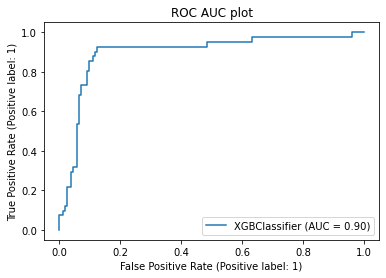

In [ ]:
plot_roc_curve(xgb,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

The AUC score of 90% is very good

# Saving the best model

In [ ]:
joblib.dump(xgb,"insurance_fraud.pkl")

['insurance_fraud.pkl']